# 1.4.10 Histograms in OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread('beach-438500_1280.jpg',0)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [12]:
hist.size

256

In [13]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

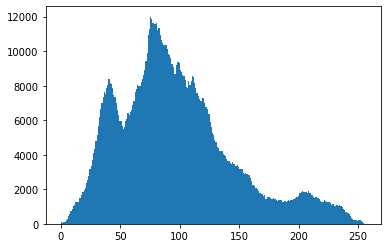

In [7]:
img = cv2.imread('beach-438500_1280.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

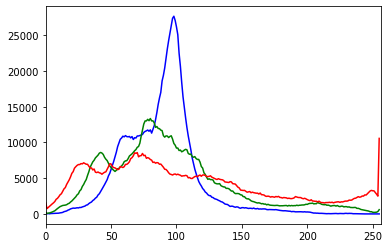

In [14]:
img = cv2.imread('beach-438500_1280.jpg')
color = ('b','g','r')

for i,col in enumerate(color):  ## 각각 칼라의 히스토 그램
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [15]:
img.shape

(853, 1280, 3)

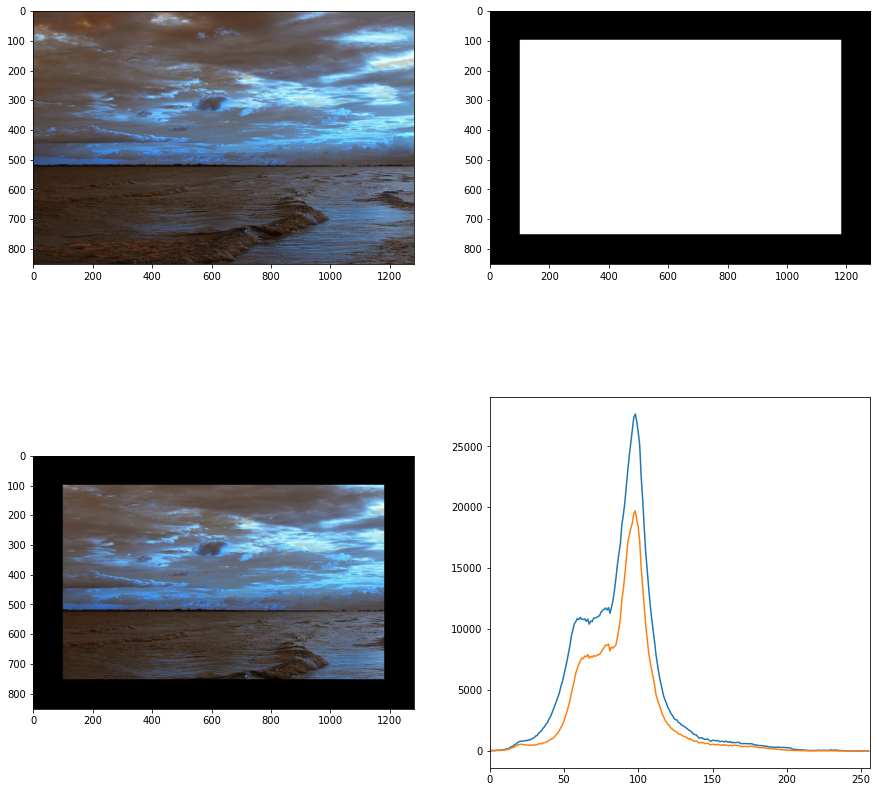

In [16]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:753, 100:1180] = 255  ## 안쪽만 지정해서 안쪽 히스토그램 구하기 
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

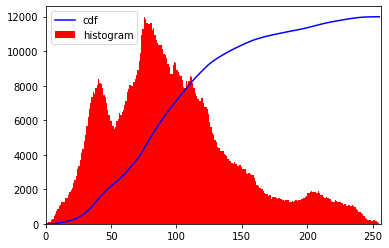

In [17]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()   ## 히스토 그램 이퀄라이저  cdf 누적된 값

In [18]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [19]:
img2 = cdf[img]

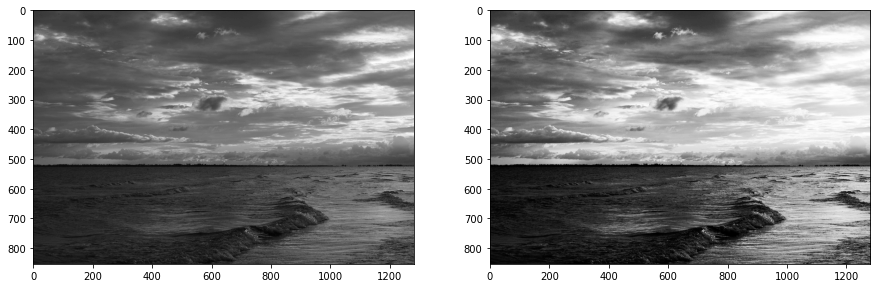

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()  ## 이퀄라이저를 통해서 밝기값 조절가능 

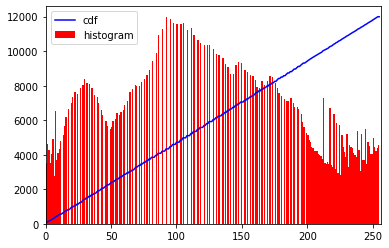

In [21]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()  ## 히스토그램이 직선이 되기위해 노력함 

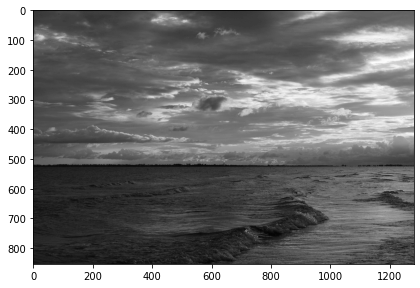

In [23]:
img = cv2.imread('beach-438500_1280.jpg',0)
equ = cv2.equalizeHist(img)  ## 히스토 그램 이퀄라이저 위에 했던것을 한번에 처리함
res = np.hstack((img,equ)) #stacking images side-by-side 이미지2개를 붙여줌
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, 'gray')
#plt.subplot(122), plt.imshow(img2,'gray')
cv2.imwrite('res.png',res)
cv2.imshow('res image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()